In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Preprocessing

In [ ]:
# Specify the paths to the text files
ref_path = 'your directory'
sys_path = 'your directory'

#SpellCheck Farasa

In [ ]:
!pip install pyjnius
!pip instal Levenshtein
import requests
import jnius_config

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.3 MB/s eta 0:00:00
ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
try:
  jnius_config.add_options('-Xrs', '-Xmx9400m')
  #jnius_config.add_options('-Xmx', '-Xmx9400m')
except:
  pass

In [ ]:
file_location_start= 'your directory'

In [ ]:
jnius_config.set_classpath(
    # '/content/drive/Shareddrives/Drive Workspace/katib/Farasa_JAR_Files/FarasaPOSJar.jar',
                          #  'farasa_jars/FarasaSegmenterJar.jar',
                           f'{file_location_start}Farasa_JAR_Files/SpellChecker.jar',
                           f'{file_location_start}Farasa_JAR_Files/FarasaSegmenterJar.jar',
                           f'{file_location_start}Farasa_JAR_Files/mallet-deps.jar',
                           f'{file_location_start}Farasa_JAR_Files/weka.jar',
                           f'{file_location_start}Farasa_JAR_Files/trove-3.0.3.jar'
                           )

In [ ]:
from jnius import autoclass
from jnius import PythonJavaClass, java_method

In [ ]:
#Farasasegmenter = autoclass('com.qcri.farasa.segmenter.Farasa')()
Farasaspellchecker = autoclass('spellchecker.SpellChecker')()
formatInput = True;
formatOutput = True; #true for site display
considerContext = True;
Farasaspellchecker.init(considerContext)

api_key1 = "rqMyaPdzCFLRtUGlXV" # Test key

def farasa_functions(f, text, key):
    url = f'https://farasa.qcri.org/webapi/{f}/'
    payload = {'text': text, 'api_key': key}
    data = requests.post(url, data=payload)
    result = json.loads(data.text)
    result = " ".join(result["text"])
    return result

In [ ]:
def remove_words(text):
    modified_text= re.sub(r'(/)(?=\s|$)', '', text)
    modified_text = re.sub(r'(\w+)\s*/\s*\w+', r'\1', modified_text)
    modified_text = re.sub('،/,', ',', modified_text)
    return modified_text

def taamarbota(input_string):
    result = ''
    for i in range(len(input_string)):
        result += input_string[i]
        if(input_string[i] == "ة" or input_string[i] == "ى") and i < len(input_string)-1 and input_string[i+1] != ' ':
            result += ' '
    return result

def the_spell_check_experience(text):
  try:
    return remove_words(Farasaspellchecker.spellCheck(taamarbota(text), formatInput, formatOutput, considerContext))

  except:
    print("failed")
    return remove_words(farasa_functions("spellcheck", text, api_key1))

In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                                ّ    | # Tashdid
                                َ    | # Fatha
                                ً    | # Tanwin Fath
                                ُ    | # Damma
                                ٌ    | # Tanwin Damm
                                ِ    | # Kasra
                                ٍ    | # Tanwin Kasr
                                ْ    | # Sukun
                                ـ     # Tatwil/Kashida
                            """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)
    return text

In [ ]:
import re

def remove_punctuation(text):
    # Define the pattern for punctuation marks
    punctuation_pattern = r"[^\w\s]"

    # Remove punctuation using regular expression substitution
    text_without_punctuation = re.sub(punctuation_pattern, "", text)

    return text_without_punctuation


In [ ]:
import os
import re

def remove_diacritics_files(file_path, txt_path):
    directory = file_path
    for filename in os.listdir(file_path):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename)) as f:
                lines = f.readlines()

            processed_lines = []
            for line in lines:
                # Trim spaces at the beginning and end of each line
                line = line.strip()
                # Make all spaces between words size of 1
                line = re.sub(r'\s+', ' ', line)
                line = remove_diacritics(line)
                processed_lines.append(line)

            output_file_path = os.path.join(txt_path, filename)
            with open(output_file_path, 'w', encoding='utf-8') as f:
                f.write('\n'.join(processed_lines))

In [ ]:
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.5 MB/s eta 0:00:00


In [ ]:
import os
import difflib

def extract_corresponding_files(sys_folder, ref_folder):
    sys_files = os.listdir(sys_path)
    ref_files = os.listdir(ref_path)
    refs=[]
    syss=[]
    for file in ref_files:
        file_ref = ref_path + file
        file_sys = sys_path + file[:13] + "sys.txt"
        refs.append(file_ref)
        # print(file_ref)
        syss.append(file_sys)
        # print(file_sys)
        # print("-------------------------------------------------------------------------------")
    return refs, syss

# Call the function to extract corresponding files
refs, syss= extract_corresponding_files(ref_path,sys_path)


Normalization

In [ ]:
#!pip install camel-tools

In [ ]:
# # Orthographic Normalization
# from camel_tools.utils.normalize import normalize_alef_maksura_ar
# from camel_tools.utils.normalize import normalize_alef_ar
# from camel_tools.utils.normalize import normalize_teh_marbuta_ar

# def ortho_normalize(text):
#     text = normalize_alef_maksura_ar(text)
#     text = normalize_alef_ar(text)
#     text = normalize_teh_marbuta_ar(text)
#     return text

#Comparing sys and ref



In [ ]:
import difflib
import string
import re
import matplotlib.pyplot as plt

## Character Level

In [ ]:
!pip install Levenshtein

Book: BK_42_03_G_3
Accuracy Score: 0.591156462585034
Minimum Edit Distance: 69
Deletions: 37
Insertions: 13
Substitutions: 19
Transpositions: 0
Book: BK_17_02_G_3
Accuracy Score: 0.4300578034682081
Minimum Edit Distance: 121
Deletions: 30
Insertions: 38
Substitutions: 53
Transpositions: 0
Book: BK_32_01_G_3
Accuracy Score: 0.37945125510799765
Minimum Edit Distance: 93
Deletions: 40
Insertions: 13
Substitutions: 40
Transpositions: 0
Book: BK_32_03_G_3
Accuracy Score: 0.022692109334708613
Minimum Edit Distance: 86
Deletions: 22
Insertions: 13
Substitutions: 51
Transpositions: 0
Book: BK_52_02_G_3
Accuracy Score: 0.953719574905725
Minimum Edit Distance: 20
Deletions: 3
Insertions: 0
Substitutions: 17
Transpositions: 0
Book: BK_42_05_G_3
Accuracy Score: 0.5549323655559222
Minimum Edit Distance: 69
Deletions: 34
Insertions: 13
Substitutions: 22
Transpositions: 0
Book: BK_42_10_G_3
Accuracy Score: 0.5430999595305545
Minimum Edit Distance: 85
Deletions: 42
Insertions: 11
Substitutions: 32
Tra

<function matplotlib.pyplot.legend(*args, **kwargs)>

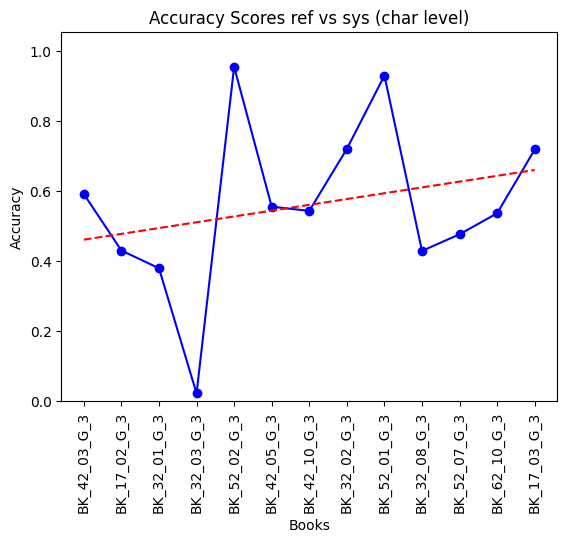

In [ ]:
import difflib
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np

def compare_ref_sys_char(file1_path, file2_path):
    # Read the contents of the files
    with open(file1_path, 'r', encoding='utf-8') as file1:
        text1 = file1.read()

    with open(file2_path, 'r', encoding='utf-8') as file2:
        text2 = file2.read()

    # Calculate the accuracy score
    accuracy = difflib.SequenceMatcher(None, text1, text2).ratio()

    # Calculate the minimum edit distance
    distance = Levenshtein.distance(text1, text2)

    # Calculate the edit operations
    editops = Levenshtein.editops(text1, text2)
    deletions = 0
    insertions = 0
    substitutions = 0
    transpositions = 0

    for op in editops:
        if op[0] == 'delete':
            deletions += 1
        elif op[0] == 'insert':
            insertions += 1
        elif op[0] == 'replace':
            substitutions += 1
        elif op[0] == 'delete' and text1[op[1]] == text2[op[2]] and op[2] - op[1] > 1:
            transpositions += 1

    return accuracy, distance, deletions, insertions, substitutions, transpositions


accuracy_scores = []  # List to store accuracy scores
deletion_counts = []  # List to store deletion counts
insertion_counts = []  # List to store insertion counts
substitution_counts = []  # List to store substitution counts
transposition_counts = []  # List to store transposition counts

for i in range(len(refs)):
    print("Book:", refs[i][len(ref_path):-8])
    accuracy, distance, deletions, insertions, substitutions, transpositions = compare_ref_sys_char(refs[i], syss[i])
    accuracy_scores.append(accuracy)
    deletion_counts.append(deletions)
    insertion_counts.append(insertions)
    substitution_counts.append(substitutions)
    transposition_counts.append(transpositions)

    # Print the results
    print("Accuracy Score:", accuracy)
    print("Minimum Edit Distance:", distance)
    print("Deletions:", deletions)
    print("Insertions:", insertions)
    print("Substitutions:", substitutions)
    print("Transpositions:", transpositions)

# Average Score
average_score = sum(accuracy_scores) / len(accuracy_scores)
print("Score Average: ", average_score)

# Create the graph
plt.plot(range(len(refs)), accuracy_scores, 'bo-')
plt.xlabel('Books')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores ref vs sys (char level)')
plt.xticks(range(len(refs)), [refs[i][len(ref_path):-8] for i in range(len(refs))], rotation='vertical')
plt.ylim(0, max(accuracy_scores) + 0.1)  # Set y-axis lower limit to zero

# Add best-fit line
x = np.array(range(len(refs)))
y = np.array(accuracy_scores)
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--', label='Best Fit Line')

plt.legend


## Word Level

Book: BK_42_03_G_3
Accuracy Score: 0.04313725490196074
Minimum Edit Distance: 68
Word Errors: 244
Book: BK_17_02_G_3
Accuracy Score: 0.005813953488372103
Minimum Edit Distance: 118
Word Errors: 171
Book: BK_32_01_G_3
Accuracy Score: 0.11875000000000002
Minimum Edit Distance: 93
Word Errors: 141
Book: BK_32_03_G_3
Accuracy Score: 0.3016759776536313
Minimum Edit Distance: 86
Word Errors: 125
Book: BK_52_02_G_3
Accuracy Score: 0.5157894736842106
Minimum Edit Distance: 20
Word Errors: 138
Book: BK_42_05_G_3
Accuracy Score: 0.23828125
Minimum Edit Distance: 69
Word Errors: 195
Book: BK_42_10_G_3
Accuracy Score: 0.04761904761904767
Minimum Edit Distance: 85
Word Errors: 220
Book: BK_32_02_G_3
Accuracy Score: 0.3152173913043478
Minimum Edit Distance: 79
Word Errors: 126
Book: BK_52_01_G_3
Accuracy Score: 0.014598540145985384
Minimum Edit Distance: 27
Word Errors: 270
Book: BK_32_08_G_3
Accuracy Score: 0.12234042553191493
Minimum Edit Distance: 80
Word Errors: 165
Book: BK_52_07_G_3
Accuracy S

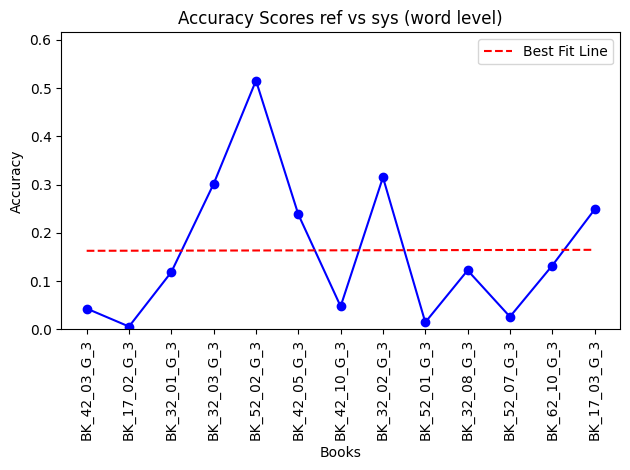

0.9090909090909091
0.8571428571428572


In [ ]:
import difflib
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np

def compare_ref_sys_word(file1_path, file2_path):
    # Read the contents of the files
    with open(file1_path, 'r', encoding='utf-8') as file1:
        text1 = file1.read()
        text1 = text1.split()
        reflen = len(text1)

    with open(file2_path, 'r', encoding='utf-8') as file2:
        text2 = file2.read()
        text2 = text2.split()

    # Calculate the accuracy score
    word_errors = sum(text1_word != text2_word for text1_word, text2_word in zip(text1, text2))
    accuracy = 1.0 - (word_errors / reflen)

    # Calculate the minimum edit distance
    distance = Levenshtein.distance(" ".join(text1), " ".join(text2))

    return accuracy, distance, word_errors


accuracy_scores = []  # List to store accuracy scores
word_error_counts = []  # List to store word error counts

for i in range(len(refs)):
    print("Book:", refs[i][len(ref_path):-8])
    accuracy, distance, word_errors = compare_ref_sys_word(refs[i], syss[i])
    accuracy_scores.append(accuracy)
    word_error_counts.append(word_errors)

    # Print the results
    print("Accuracy Score:", accuracy)
    print("Minimum Edit Distance:", distance)
    print("Word Errors:", word_errors)

# Average Score
average_score = sum(accuracy_scores) / len(accuracy_scores)
print("Score Average:", average_score)
accuracy_scores2 = accuracy_scores

# Create the graph
plt.plot(range(len(refs)), accuracy_scores, 'bo-')
plt.xlabel('Books')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores ref vs sys (word level)')
plt.xticks(range(len(refs)), [refs[i][len(ref_path):-8] for i in range(len(refs))], rotation='vertical')
plt.ylim(0, max(accuracy_scores) + 0.1)  # Set y-axis lower limit to zero

# Add best-fit line
x = np.array(range(len(refs)))
y = np.array(accuracy_scores)
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--', label='Best Fit Line')

plt.legend()
plt.tight_layout()
plt.show()


def check(text1,text2):
  text1 = text1.split()
  reflen = len(text1)
  text2 = text2.split()
  word_errors = sum(text1_word != text2_word for text1_word, text2_word in zip(text1, text2))
  acc = 1.0 - (word_errors / reflen)
  print(acc)

text1 ="في استحباب تحويل الرداء ولم يستحبه أبو حنيفة ويستحب عندنا أيضا"
text2= "فى استحباب تحويل الرداء ولم يستحبه أبو حنيفة ويستحب عندنا أيضا"
check(text1,text2)
text1 ="للمأمومين كما يستحب للأمام ، وبه قال مالك وغيره ، وخالف فيه جماعة من"
text2= "للمأمومين كما يستحب للأمام , وبه قال مالك وغيره » وخالف فيه جماعة من"
check(text1,text2)

# Comparing sys_spellcheck and ref

In [ ]:
import json
import requests
import difflib
import Levenshtein
import string
import re


##Spell Check

In [ ]:
api_key1 = "rqMyaPdzCFLRtUGlXV" # Test key


def remove_slashes(text):
    pattern = r'(/)(?=\s|$)'  # Pattern to match a slash followed by a space or end of line
    modified_text = re.sub(pattern, '', text)
    return modified_text

def remove_words(text):
    pattern = r'(\w+)\s*/\s*\w+'  # Pattern to match the desired format
    pattern1= '،/,'
    text= remove_slashes(text)
    modified_text = re.sub(pattern, r'\1', text)
    modified_text = re.sub(pattern1, ',', modified_text)
    return modified_text



def farasa_functions(f, text):
    url = f'https://farasa.qcri.org/webapi/{f}/'
    payload = {'text': text, 'api_key': api_key1}
    data = requests.post(url, data=payload)
    result = json.loads(data.text)
    processed_text = "".join(result["text"])
    processed_text = remove_words(processed_text)

    lines = processed_text.splitlines()
    processed_lines = []

    for line in lines:
        # Trim spaces at the beginning and end of each line
        line = line.strip()
        # Make all spaces between words size of 1
        line = re.sub(r'\s+', ' ', line)
        processed_lines.append(line)

    result = '\n'.join(processed_lines)
    return result


In [ ]:
import os

def spellcheck_textfile(file_path, txt_path):
    directory = file_path
    for filename in os.listdir(file_path):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename)) as f:
                text = f.read()
                text = farasa_functions("spellcheck", text)
            output_file_path = os.path.join(txt_path, filename)
            with open(output_file_path, 'w', encoding='utf-8') as f:
                f.write(text)


In [ ]:
# spellcheck_textfile("/content/drive/My Drive/QCRI/ArabicTextSimplification_QCRI_Internship/QNL_Book_Test/Aligned_books/sys", "/content/drive/My Drive/QCRI/ArabicTextSimplification_QCRI_Internship/QNL_Book_Test/Aligned_books/sys_spellcheck")

In [ ]:
import difflib
import Levenshtein
import string
import re
import matplotlib.pyplot as plt

## Word Level

Accuracy Score: 0.1568627450980392
Minimum Edit Distance: 79
Accuracy Score: 0.005813953488372103
Minimum Edit Distance: 127
Accuracy Score: 0.050000000000000044
Minimum Edit Distance: 107
Accuracy Score: 0.05027932960893855
Minimum Edit Distance: 99
Accuracy Score: 0.856140350877193
Minimum Edit Distance: 41
Accuracy Score: 0.3359375
Minimum Edit Distance: 92
Accuracy Score: 0.5281385281385281
Minimum Edit Distance: 105
Accuracy Score: 0.3532608695652174
Minimum Edit Distance: 95
Accuracy Score: 0.014598540145985384
Minimum Edit Distance: 45
Accuracy Score: 0.0957446808510638
Minimum Edit Distance: 94
Accuracy Score: 0.01744186046511631
Minimum Edit Distance: 103
Accuracy Score: 0.023346303501945553
Minimum Edit Distance: 127
Accuracy Score: 0.0
Minimum Edit Distance: 109
Score Average:  0.19135112782618455


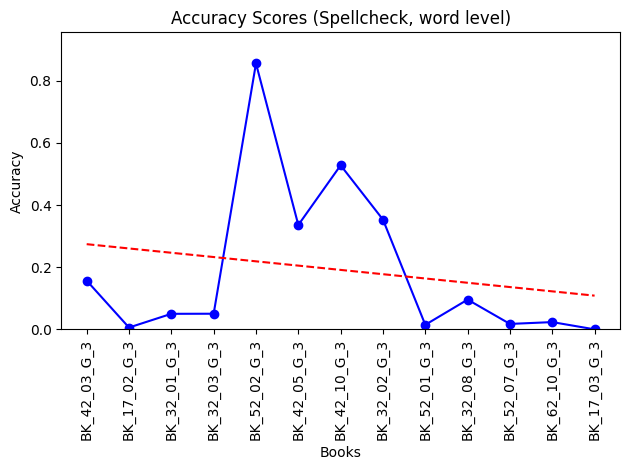

In [ ]:
import difflib
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np

def compare_ref_sys_spellcheck_word(file1_path, file2_path):
    # Read the contents of the files
    with open(file1_path, 'r', encoding='utf-8') as file1:
        text1 = file1.read()
        text1 = remove_diacritics(text1)
        text1 = text1.split()
        reflen = len(text1)

    with open(file2_path, 'r', encoding='utf-8') as file2:
        text2 = file2.read()
        text2 = remove_diacritics(text2)
        text2 = the_spell_check_experience(text2).rstrip()
        text2 = text2.split()

    # Calculate the accuracy score
    word_errors = sum(text1_word != text2_word for text1_word, text2_word in zip(text1, text2))
    accuracy = 1.0 - (word_errors / reflen)

    # Calculate the minimum edit distance
    distance = Levenshtein.distance(" ".join(text1), " ".join(text2))

    return accuracy, distance, word_errors

accuracy_scores = []  # List to store accuracy scores

for i in range(len(refs)):
    #print("Book:", refs[i][len(ref_path):-8])
    accuracy, distance,word_errors = compare_ref_sys_spellcheck_word(refs[i], syss[i])
    accuracy_scores.append(accuracy)

    # Print the results
    print("Accuracy Score:", accuracy)
    print("Minimum Edit Distance:", distance)

# Average Score
average_score = sum(accuracy_scores) / len(accuracy_scores)
print("Score Average: ", average_score)
accuracy_scores5 = accuracy_scores

# Create the graph
plt.plot(range(len(refs)), accuracy_scores, 'bo-')
plt.xlabel('Books')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores (Spellcheck, word level)')
plt.xticks(range(len(refs)), [refs[i][len(ref_path):-8] for i in range(len(refs))], rotation='vertical')
plt.ylim(0, max(accuracy_scores) + 0.1)  # Set y-axis lower limit to zero

# Add best-fit line
x = np.array(range(len(refs)))
y = np.array(accuracy_scores)
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], 'r--')

plt.tight_layout()
plt.show()


Word Level but char level

Accuracy Score: 0.7731755424063116
Minimum Edit Distance: 79
Accuracy Score: 0.5604395604395604
Minimum Edit Distance: 127
Accuracy Score: 0.5846153846153846
Minimum Edit Distance: 107
Accuracy Score: 0.6318681318681318
Minimum Edit Distance: 99
Accuracy Score: 0.8526315789473684
Minimum Edit Distance: 41
Accuracy Score: 0.7286821705426356
Minimum Edit Distance: 92
Accuracy Score: 0.691304347826087
Minimum Edit Distance: 105
Accuracy Score: 0.6666666666666666
Minimum Edit Distance: 95
Accuracy Score: 0.8754578754578755
Minimum Edit Distance: 45
Accuracy Score: 0.6473684210526316
Minimum Edit Distance: 94
Accuracy Score: 0.7259475218658892
Minimum Edit Distance: 103
Accuracy Score: 0.6323809523809524
Minimum Edit Distance: 127
Accuracy Score: 0.5906432748538012
Minimum Edit Distance: 109
Score Average:  0.689321648378715


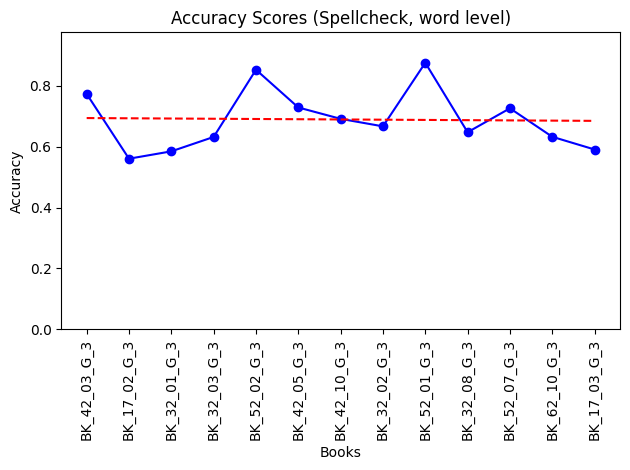

In [ ]:
import difflib
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np

def compare_ref_sys_spellcheck_word(file1_path, file2_path):
    # Read the contents of the files
    with open(file1_path, 'r', encoding='utf-8') as file1:
        text1 = file1.read()
        text1 = remove_diacritics(text1)
        text1 = text1.split()
        reflen = len(text1)

    with open(file2_path, 'r', encoding='utf-8') as file2:
        text2 = file2.read()
        text2 = remove_diacritics(text2)
        text2 = the_spell_check_experience(text2).rstrip()
        text2 = text2.split()

    # Calculate the accuracy score
    accuracy = difflib.SequenceMatcher(None, text1, text2).ratio()

    # Calculate the minimum edit distance
    distance = Levenshtein.distance(" ".join(text1), " ".join(text2))

    return accuracy, distance


accuracy_scores = []  # List to store accuracy scores

for i in range(len(refs)):
    #print("Book:", refs[i][len(ref_path):-8])
    accuracy, distance = compare_ref_sys_spellcheck_word(refs[i], syss[i])
    accuracy_scores.append(accuracy)

    # Print the results
    print("Accuracy Score:", accuracy)
    print("Minimum Edit Distance:", distance)

# Average Score
average_score = sum(accuracy_scores) / len(accuracy_scores)
print("Score Average: ", average_score)
accuracy_scores6 = accuracy_scores

# Create the graph
plt.plot(range(len(refs)), accuracy_scores, 'bo-')
plt.xlabel('Books')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores (Spellcheck, word level)')
plt.xticks(range(len(refs)), [refs[i][len(ref_path):-8] for i in range(len(refs))], rotation='vertical')
plt.ylim(0, max(accuracy_scores) + 0.1)  # Set y-axis lower limit to zero

# Add best-fit line
x = np.array(range(len(refs)))
y = np.array(accuracy_scores)
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], 'r--')

plt.tight_layout()
plt.show()


Errors

In [ ]:
def align(a, b):
    T = [[0] * (len(b) + 1) for _ in range(len(a) + 1)]

    for i in range(len(a) + 1):
        T[i][0] = i

    for j in range(len(b) + 1):
        T[0][j] = j

    for i in range(1, len(a) + 1):
        for j in range(1, len(b) + 1):
            if a[i - 1] == b[j - 1]:
                T[i][j] = T[i - 1][j - 1]
            else:
                T[i][j] = min(T[i - 1][j], T[i][j - 1]) + 1

    aa, bb = [], []

    i, j = len(a), len(b)
    while i > 0 or j > 0:
        if i > 0 and T[i][j] == T[i - 1][j] + 1:
            aa.append(a[i - 1])
            bb.append("-")
            i -= 1
        elif j > 0 and T[i][j] == T[i][j - 1] + 1:
            bb.append(b[j - 1])
            aa.append("-")
            j -= 1
        elif i > 0 and j > 0 and T[i][j] == T[i - 1][j - 1]:
            aa.append(a[i - 1])
            bb.append(b[j - 1])
            i -= 1
            j -= 1

    return "".join(reversed(aa)), "".join(reversed(bb))


# Test the align function with Arabic texts
a = "مما تأثر به كاتب مثل الحريرى أو شاعر مثل أبى العلاء ، ولهذا"
b = "مما تأثر به كاتب” مثل الحر يرى أو شاعر” مثل ألى العلاء» وهذا"
def getdiffwords(a,b):
  aligned = align(a, b)
  sentence1 = aligned[0]
  sentence2 = aligned[1]
  words1 = sentence1.split()
  words2 = sentence2.split()
  words=[]
  for word1, word2 in zip(words1, words2):
    word1 = word1.replace("-", "").strip()
    word2 = word2.replace("-", "").strip()
    words.append((word1, word2))
  return(words)


In [ ]:
from collections import Counter

def compare_text_files3(file1_path, file2_path):
    # Read the contents of the files
    with open(file1_path, 'r', encoding='utf-8') as file1, open(file2_path, 'r', encoding='utf-8') as file2:
        differing_words = []
        accuracy_scores = []
        repeated_errors = Counter()

        for line1, line2 in zip(file1, file2):
            line1 = line1.strip()
            line2 = line2.strip()

            # Remove diacritics and extra spaces from each line
            line1 = remove_diacritics(line1)
            line1 = re.sub(r'\s+', ' ', line1)
            line2 = the_spell_check_experience(line2).rstrip()
            line2 = remove_diacritics(line2)
            line2 = re.sub(r'\s+', ' ', line2)

            # Split the lines into words
            words1 = line1.split()
            words2 = line2.split()

            # Find differing words
            differing_line_words= getdiffwords(line1, line2)
            differing_words.extend(differing_line_words)
            # Calculate the accuracy score
            accuracy = difflib.SequenceMatcher(None, words1, words2).ratio()
            accuracy_scores.append(accuracy)

            # Calculate the minimum edit distance
            distance = Levenshtein.distance(" ".join(words1), " ".join(words2))

            # Update repeated errors count
            for word1, word2 in differing_line_words:
                repeated_errors[(word1, word2)] += 1
        # Calculate the average accuracy score
        average_score = sum(accuracy_scores) / len(accuracy_scores)

    return average_score, differing_words, repeated_errors,


differing_words_all=[]
for i in range(len(refs)):
    print("Book:", refs[i][len(ref_path):-8])
    average_score, differing_words, repeated_errors, = compare_text_files3(refs[i], syss[i])
    differing_words_all.append(differing_words)

def flatten_2d_list(input_list):
    flattened_list = []
    for sublist in input_list:
        for item in sublist:
            flattened_list.append(item)
    return flattened_list

# Example usage
flattened_list = flatten_2d_list(differing_words_all)

def filter_tuples_by_letter_difference(word_tuples):
  same_len=[]
  for tup in word_tuples:
    word1, word2 = tup
    if len(word1)== len(word2):
      same_len.append(tup)
  filtered_tuples = [tuple_pair for tuple_pair in same_len if letter_difference(tuple_pair) == 1]
  return filtered_tuples

def letter_difference(tuple_pair):
    word1, word2 = tuple_pair
    if len(word1) != len(word2):
        return len(word1) - len(word2)
    difference_count = sum([1 for c1, c2 in zip(word1, word2) if c1 != c2])
    return difference_count

# Example usage
filtered_tuples = filter_tuples_by_letter_difference(flattened_list)
print(filtered_tuples)
print(len(filtered_tuples))

Book: BK_42_03_G_3
Book: BK_17_02_G_3
Book: BK_32_01_G_3
Book: BK_32_03_G_3
Book: BK_52_02_G_3
Book: BK_42_05_G_3
Book: BK_42_10_G_3
Book: BK_32_02_G_3
Book: BK_52_01_G_3
Book: BK_32_08_G_3
Book: BK_52_07_G_3
Book: BK_62_10_G_3
Book: BK_17_03_G_3
[('فى', 'في'), ('التى', 'التي'), ('فى', 'في'), ('ثم', 'لم'), ('ممر', 'تمر'), ('التجول', 'التحول'), ('فى', 'في'), ('الأشراف', 'الإشراف'), ('وتنوعت', 'وتنوءت'), ('أراضى', 'أراضي'), ('الزراعى', 'الزراعي'), ('أجراء', 'إجراء'), ('فى', 'في'), ('سنراه', 'ستراه'), ('فى', 'في'), ('القارىء', 'القاريء'), ('،', '6'), ('بغداد', 'بشداد'), ('فى', 'في'), ('القرن', 'المرن'), ('المصرى', 'المصري'), ('متوهم', 'لتوهم'), ('القارئ', 'القاري'), ('البين', 'البطن'), ('للطعن', 'للطمن'), ('فى', 'في'), ('الرقيق', 'الرفيق'), ('نقول', 'تقول'), ('،', '»'), ('،', '»'), ('،', '.'), ('فما', 'فيا'), ('،', 'ل'), ('العربى', 'العربي'), ('التى', 'التي'), ('وعملت', 'وحملت'), ('فى', 'في'), ('فى', 'في'), ('فى', 'في'), ('،', '»'), ('فى', 'في'), ('سهوله', 'سهولة'), ('يقوم', 'بقوم'), ('وا

#Most Common Errors

In [ ]:
from collections import Counter

def find_errors(word_tuples):
    errors = []
    for word1, word2 in word_tuples:
        for letter1, letter2 in zip(word1, word2):
            if letter1 != letter2:
                errors.append((letter1, letter2))

    error_counts = Counter(errors)
    sorted_errors = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)

    return sorted_errors

# Example usage
errors = find_errors(filtered_tuples)

for error, count in errors:
    print(f"{error[0]} {error[1]} " + f"{count} occurrence(s)")
    print()


ى ي 148 occurrence(s)

، » 39 occurrence(s)

، . 20 occurrence(s)

ي ب 11 occurrence(s)

، , 9 occurrence(s)

أ إ 6 occurrence(s)

ع م 5 occurrence(s)

ه ة 5 occurrence(s)

ل ا 4 occurrence(s)

ج ح 3 occurrence(s)

ن ت 3 occurrence(s)

، 6 3 occurrence(s)

ه ح 3 occurrence(s)

ت م 3 occurrence(s)

م ي 2 occurrence(s)

ت ن 2 occurrence(s)

ب ي 2 occurrence(s)

م ب 2 occurrence(s)

ح خ 2 occurrence(s)

، 2 2 occurrence(s)

، ؛ 2 occurrence(s)

، ٠ 2 occurrence(s)

ث ل 1 occurrence(s)

م ت 1 occurrence(s)

ع ء 1 occurrence(s)

غ ش 1 occurrence(s)

ق م 1 occurrence(s)

م ل 1 occurrence(s)

ئ ي 1 occurrence(s)

ي ط 1 occurrence(s)

ق ف 1 occurrence(s)

، ل 1 occurrence(s)

ع ح 1 occurrence(s)

ع ن 1 occurrence(s)

ب ن 1 occurrence(s)

ت ي 1 occurrence(s)

ز م 1 occurrence(s)

ا أ 1 occurrence(s)

" 2 1 occurrence(s)

" ؟ 1 occurrence(s)

ح ل 1 occurrence(s)

ب م 1 occurrence(s)

ج د 1 occurrence(s)

ا إ 1 occurrence(s)

ث أ 1 occurrence(s)

ن م 1 occurrence(s)

. : 1 occurrence(s)

ض غ 1 oc

Notes ---

- difflib.get_close_matches --> helper built-in function that returns a list of the best “good enough” matches.
- Comparing words in ref with sys
- Cutoff is set to 0.70 works best as there are loosely matched words
- The dictionary returns the word from file 1 with its best match from file 2 and the number of times each word occured in the file

In [ ]:
import difflib
import collections

def freq_difference(ref, sys):

    with open(ref, 'r', encoding="utf-8") as f:
        text1 = f.read().split()
    with open(sys, 'r', encoding="utf-8") as f:
        text2 = f.read().split()

    # get unique words
    words1 = set(text1)
    words2 = set(text2)

    # dic for matches from both file
    freq_diff = {}

    for word1 in words1:
        for word2 in words2:
            # get close matches of word1 in word2
            if word2 in difflib.get_close_matches(word1, [word2], n=2, cutoff=0.70) and word1 != word2:
                freq_diff[(word1, word2)] = (text1.count(word1), text2.count(word2))
    return freq_diff



#Valid Sentences Filtering

In [ ]:
!pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import difflib
import Levenshtein
import re
import os

def is_valid_arabic_sentence(sentence):
    # Calculate the number of errors
    spellchecked_org = (the_spell_check_experience(sentence)).rstrip()
    sentence = remove_diacritics(sentence)
    sentence = remove_punctuation(sentence)
    #spellchecked = farasa_functions("spellcheck", sentence)
    spellchecked= the_spell_check_experience(sentence)

    sentence_words = re.findall(r'\b\w+\b', sentence)
    spellchecked_words = re.findall(r'\b\w+\b', spellchecked)
    word_errors = sum(1 for word1, word2 in zip(sentence_words, spellchecked_words) if word1 != word2)
    sentence_words = re.findall(r'\b\w+\b', sentence)
    # Calculate the percentage of correct words
    word_count = len(sentence_words)
    if word_count == 0:
        return False, ""
    incorrect_word_percentage = (word_errors) / word_count * 100
    short_word_count = sum(len(word) <= 3 for word in sentence_words)
    short_word_percentage = (short_word_count / len(sentence_words)) * 100

    # Check if the sentence meets the conditions
    if len(sentence_words) > 4 and  short_word_percentage < 50 and word_errors / word_count <= 0.2:
        return True, spellchecked_org
    else:
        return False, ""


files= ["1_G06_T1.pdf.txt", "13_G06_T1.pdf.txt", "54_G06_T1.pdf.txt", "61_G06_T1.pdf.txt", "88_G06_T1.pdf.txt",
        "102_G06_T1.pdf.txt", "105_G06_T1.pdf.txt", "116_G06_T1.pdf.txt", "126_G06_T1.pdf.txt", "127_G06_T1.pdf.txt"]
book = "G12_T2"
input_folder_path = 'your directory'
output_folder_path = 'your directory'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
# Process each text file in the input folder


for file_name in os.listdir(input_folder_path):

  if file_name.endswith(".txt"):
    num = file_name[:-15]
    input_file_path = os.path.join(input_folder_path, file_name)
    output_file_path = os.path.join(output_folder_path, file_name)

    with open(input_file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()

    # Process each line and write the results to the output file
    with open(output_file_path, "w", encoding="utf-8") as file:
        for line in lines:
             # Remove leading/trailing whitespace
            if not line:
                continue  # Skip empty lines
            valid, correction = is_valid_arabic_sentence(line)
            if valid:
                line = line.strip()
                file.write(f"{line} OK\n")
                file.write(f"{correction} SPELLCHECKED\n")
                #print(f"'{line}' is a valid Arabic sentence.")
            else:
              file.write(f"{line}")
                #print(f"'{line}' is not a valid Arabic sentence.")

    print(f"Output file '{output_file_path}' has been created.")

Output file '/content/drive/MyDrive/QCRI/ArabicTextSimplification_QCRI_Internship/Qatar_Curriculum_Books/ArabicBooks/Completed_textfiles/G12_T2/G12_T2.pdf_dirtextfiles_validation/0_G12_T2.pdf.txt' has been created.
Output file '/content/drive/MyDrive/QCRI/ArabicTextSimplification_QCRI_Internship/Qatar_Curriculum_Books/ArabicBooks/Completed_textfiles/G12_T2/G12_T2.pdf_dirtextfiles_validation/1_G12_T2.pdf.txt' has been created.
Output file '/content/drive/MyDrive/QCRI/ArabicTextSimplification_QCRI_Internship/Qatar_Curriculum_Books/ArabicBooks/Completed_textfiles/G12_T2/G12_T2.pdf_dirtextfiles_validation/2_G12_T2.pdf.txt' has been created.
Output file '/content/drive/MyDrive/QCRI/ArabicTextSimplification_QCRI_Internship/Qatar_Curriculum_Books/ArabicBooks/Completed_textfiles/G12_T2/G12_T2.pdf_dirtextfiles_validation/3_G12_T2.pdf.txt' has been created.
Output file '/content/drive/MyDrive/QCRI/ArabicTextSimplification_QCRI_Internship/Qatar_Curriculum_Books/ArabicBooks/Completed_textfiles/G12

In [ ]:
import os
import re
def extract_spellchecked_lines(input_folder_path, output_file_path):
  total_sentences = 0
  extracted_sentences = 0
  # Process each text file in the input folder
  #for file_name in os.listdir(input_folder_path):
  book = "G12_T2"
  for i in range(int(num)):
      input_file_path = os.path.join(input_folder_path, f"{i}_{book}.pdf.txt")

      with open(input_file_path, "r", encoding="utf-8") as file:
          lines = file.readlines()

      # Process each line and write the spellchecked lines to the output file
      with open(output_file_path, "a", encoding="utf-8") as file:
        flag= True
        any_lines= False
        for line in lines:
            words = re.findall(r'\b\w+\b', line)
            if "SPELLCHECKED" in line:
              flag= True
              extracted_sentences += 1
              line = line.replace("SPELLCHECKED", "").strip()
              file.write(f"{line}\n")
            elif "OK" in line and flag :
              flag= False
              if any_lines:
                file.write("XXX\n")
                any_lines= False
            else:
              if len(words) > 0:
                file.write("\n")
                total_sentences += 1
              if flag and line != "\n":
                any_lines= True

  print(f"Extracted {extracted_sentences} from {total_sentences} sentences.")

book = "G12_T2"
# Example usage
input_folder_path = 'your directory'
output_file_path = 'your directory'

# Delete the output file if it already exists
if os.path.exists(output_file_path):
    os.remove(output_file_path)

extract_spellchecked_lines(input_folder_path, output_file_path)


Extracted 1787 from 2530 sentences.


##file merge

In [ ]:
def merge_files(file1_path, file2_path, merged_file_path):
    with open(file1_path, 'r', encoding='utf-8') as file1:
        text1 = file1.read()

    with open(file2_path, 'r', encoding='utf-8') as file2:
        text2 = file2.read()

    merged_text = text1 + text2

    with open(merged_file_path, 'w', encoding='utf-8') as merged_file:
        merged_file.write(merged_text)

# Example usage
grade= "12"
file1_path = 'your directory'
file2_path ='your directory'
merged_file_path = 'your directory'

merge_files(file1_path, file2_path, merged_file_path)


In [ ]:
def remove_extra_empty_lines(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        lines = input_file.readlines()

    # Remove extra empty lines
    cleaned_lines = []
    empty_line_count = 0
    for line in lines:
        if line.strip() == '':
            empty_line_count += 1
            if empty_line_count <= 2:
                cleaned_lines.append(line)
        else:
            empty_line_count = 0
            cleaned_lines.append(line)

    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.writelines(cleaned_lines)

# Example usage
input_file_path = 'your directory'
output_file_path = 'your directory'

remove_extra_empty_lines(input_file_path, output_file_path)


In [ ]:
import re

def clean_sentence(sentence, end_chars):
    cleaned_sentence = []
    prev_char = None

    for char in sentence:
        if char == ' ' and prev_char in end_chars:
            continue
        elif char == ' ' and prev_char == ' ':
            continue
        cleaned_sentence.append(char)
        prev_char = char

    return ''.join(cleaned_sentence)

def extract_sent(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        end_of_sent = ['.', '!', '؟', ':']
        sentences = []
        lines = input_file.readlines()
        start = True
        end = False
        sentence = ''

        for line in lines:
            line = line.strip()
            line = line + " "

            if not line:  # Empty line
                start = True
                continue

            if "XXX" in line:
                start = False

            for letter in line:
                if letter in end_of_sent:
                    end = True
                    start = True
                    sentence += letter

                if start and not end:
                    sentence += letter

                elif start and end:
                    # sentence += letter
                    if sentence != '' and len(sentence.strip()) != 1:
                        sentences.append(clean_sentence(sentence.strip(), end_of_sent))
                    sentence = ''
                    end = False

    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write('\n'.join(sentences))

    return sentences


for i in range (1,13):
  index = str(i).zfill(2)
  print(index)
  input_file_path =  'your directory'
  output_file_path = 'your directory'
  extract_sent(input_file_path,output_file_path)


01
02
03
04
05
06
07
08
09
10
11
12


In [ ]:
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.strip()
            no_line = remove_punctuation(line)
            words = no_line.split(" ")
            words = [word for word in words if word != '']
            if line and len(words) > 2:
                filtered_lines.append(line)

    with open(file_path, 'w') as file:
        file.write('\n'.join(filtered_lines))


for i in range(1,13):
  index= formatted_number = str(i).zfill(2)
  filter_lines('your directory')

